In [1777]:
import pandas as pd
import numpy as np
from tensorflow import keras
import seaborn as sns

In [1778]:
df = pd.read_csv('survey_lung_cancer.csv')
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [1779]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [1780]:
df['GENDER'].value_counts()

GENDER
M    162
F    147
Name: count, dtype: int64

In [1781]:
x= df.drop(columns='LUNG_CANCER')
y= df['LUNG_CANCER']

In [1782]:
x.head(10)

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1
5,F,75,1,2,1,1,2,2,2,2,1,2,2,1,1
6,M,52,2,1,1,1,1,2,1,2,2,2,2,1,2
7,F,51,2,2,2,2,1,2,2,1,1,1,2,2,1
8,F,68,2,1,2,1,1,2,1,1,1,1,1,1,1
9,M,53,2,2,2,2,2,1,2,1,2,1,1,2,2


In [1783]:
y.head(5)

0    YES
1    YES
2     NO
3     NO
4     NO
Name: LUNG_CANCER, dtype: object

In [1784]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

In [1785]:
x['GENDER'] = x['GENDER'].map({"M":1, "F":2}) #Mapping M = 1, F = 2
x.head(10)


,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2
2,2,59,1,1,1,2,1,2,1,2,1,2,2,1,2
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2
4,2,63,1,2,1,1,1,1,1,2,1,2,2,1,1
5,2,75,1,2,1,1,2,2,2,2,1,2,2,1,1
6,1,52,2,1,1,1,1,2,1,2,2,2,2,1,2
7,2,51,2,2,2,2,1,2,2,1,1,1,2,2,1
8,2,68,2,1,2,1,1,2,1,1,1,1,1,1,1
9,1,53,2,2,2,2,2,1,2,1,2,1,1,2,2


In [1786]:
mnScaler = MinMaxScaler()
x_scaled = mnScaler.fit_transform(x)
print(x_scaled[:2])

[[0.         0.72727273 0.         1.         1.         0.
  0.         1.         0.         1.         1.         1.
  1.         1.         1.        ]
 [0.         0.8030303  1.         0.         0.         0.
  1.         1.         1.         0.         0.         0.
  1.         1.         1.        ]]


In [1787]:
le = LabelEncoder()
y_scaled = le.fit_transform(y)   #No = 0, Yes = 1  (encoded in alphabetical order)
print(y_scaled[:5])

[1 1 0 0 0]


In [1788]:
# y_scaled = keras.utils.to_categorical(y_scaled, num_classes=2)
# print(y_scaled[:5])

In [1789]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y_scaled, test_size=0.2, shuffle=True, random_state=42)  #Standard test size = 20 - 30%. Small data set: 30 - 40% Big data set: 10 - 20% 

In [1790]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [1791]:
model = Sequential()
model.add(Dense(units=32, input_dim=x_train.shape[1], activation='relu'))
model.add(Dense(units=32, activation='relu')) #try with model.add(Dropout(0.2))
# model.add(Dropout(0.2))
# model.add(Dense(units=16, activation='relu'))
# model.add(Dropout(0.5))
model.add(Dense(units=1, activation='sigmoid'))

c:\Users\Radowan Ahmed Baized\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [1792]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_122"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_404 (Dense)               │ (None, 32)             │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_405 (Dense)               │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_406 (Dense)               │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,601 (6.25 KB)

 Trainable params: 1,601 (6.25 KB)

 Non-trainable params: 0 (0.00 B)

In [1793]:
model.fit(x_train, y_train, batch_size=32, epochs=100, verbose=2)

Epoch 1/100
8/8 - 1s - 143ms/step - accuracy: 0.4534 - loss: 0.7137
Epoch 2/100
8/8 - 0s - 6ms/step - accuracy: 0.8300 - loss: 0.6107
Epoch 3/100
8/8 - 0s - 6ms/step - accuracy: 0.8502 - loss: 0.5320
Epoch 4/100
8/8 - 0s - 6ms/step - accuracy: 0.8502 - loss: 0.4697
Epoch 5/100
8/8 - 0s - 5ms/step - accuracy: 0.8502 - loss: 0.4154
Epoch 6/100
8/8 - 0s - 5ms/step - accuracy: 0.8502 - loss: 0.3753
Epoch 7/100
8/8 - 0s - 4ms/step - accuracy: 0.8502 - loss: 0.3551
Epoch 8/100
8/8 - 0s - 4ms/step - accuracy: 0.8502 - loss: 0.3457
Epoch 9/100
8/8 - 0s - 4ms/step - accuracy: 0.8502 - loss: 0.3409
Epoch 10/100
8/8 - 0s - 4ms/step - accuracy: 0.8502 - loss: 0.3351
Epoch 11/100
8/8 - 0s - 4ms/step - accuracy: 0.8502 - loss: 0.3293
Epoch 12/100
8/8 - 0s - 4ms/step - accuracy: 0.8502 - loss: 0.3251
Epoch 13/100
8/8 - 0s - 4ms/step - accuracy: 0.8502 - loss: 0.3177
Epoch 14/100
8/8 - 0s - 4ms/step - accuracy: 0.8502 - loss: 0.3120
Epoch 15/100
8/8 - 0s - 4ms/step - accuracy: 0.8502 - loss: 0.3063
Ep

In [1773]:
# prediction = model.predict(x_test)
# print(prediction[:5])

# prediction = np.argmax(prediction, axis=-1)
# print(prediction[:5])

In [1774]:
# print(y_test[:5])
# actual= np.argmax(y_test, axis=-1)
# print(actual[:5])


In [1775]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [1794]:
# ac_score = accuracy_score(actual, prediction)
# print(ac_score)

loss, accuracy = model.evaluate(x_test, y_test)
print(f'Test Accuracy: {accuracy}')

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9577 - loss: 0.1788  
Test Accuracy: 0.9677419066429138


In [843]:
c_matrix = confusion_matrix(actual, prediction)
print(c_matrix)

[[ 9  3]
 [ 2 64]]


Text(50.72222222222221, 0.5, 'Actual')

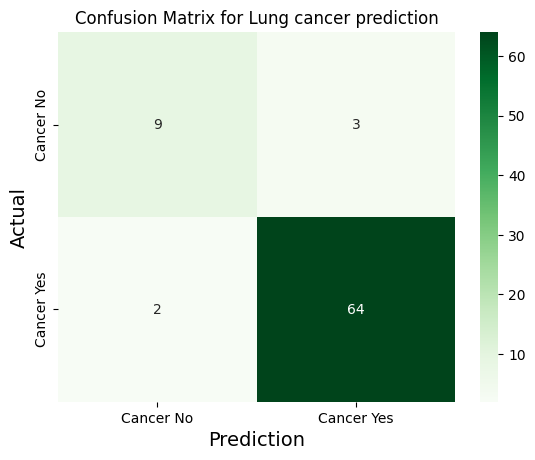

In [844]:
label = ['Cancer No', 'Cancer Yes']
ax = sns.heatmap(c_matrix, annot=True, fmt='d', cmap='Greens', xticklabels=label, yticklabels=label)
ax.set_title('Confusion Matrix for Lung cancer prediction')
ax.set_xlabel('Prediction', fontsize=14)
ax.set_ylabel('Actual', fontsize=14)